['date', '3', '4', '5', '6', '7', '8', '13', '14', '16', '17', '18']
        date  3    4    5    6  7  8   13  14  16  17  18
0 2022-05-13  0    0    0    0  0  0    0   0   0   0   0
1 2022-05-14  0   33    0    1  0  0   37   0   0   0   0
2 2022-05-15  0  129    0   48  0  0   37   0   0   0   0
3 2022-05-16  0  163    0   59  0  0  152   0   0   0   0
4 2022-05-17  0  295    0  150  0  0  152   0   5   0   0
5 2022-05-18  0  295    0  154  0  0  154  48   5   0  18
6 2022-05-19  0  295   33  154  0  0  154  48   5   0  37
7 2022-05-20  0  361  103  161  0  0  154  66  12   0  55
8 2022-05-21  4  361  140  161  0  0  154  84  12   0  55
9 2022-05-22  4  500  206  173  0  0  172  96  42   0  89
        date  3   4   5   6  7  8  13  14  16  17  18
0 2022-05-13  0   0   0   0  0  0   0   0   0   0   0
1 2022-05-14  1  11   1   7  1  1   8   1   1   1   1
2 2022-05-15  1  11   1   7  1  1   8   1   1   1   1
3 2022-05-16  1  13   1   7  1  1   8   1   1   1   1
4 2022-05-17  1  14   1

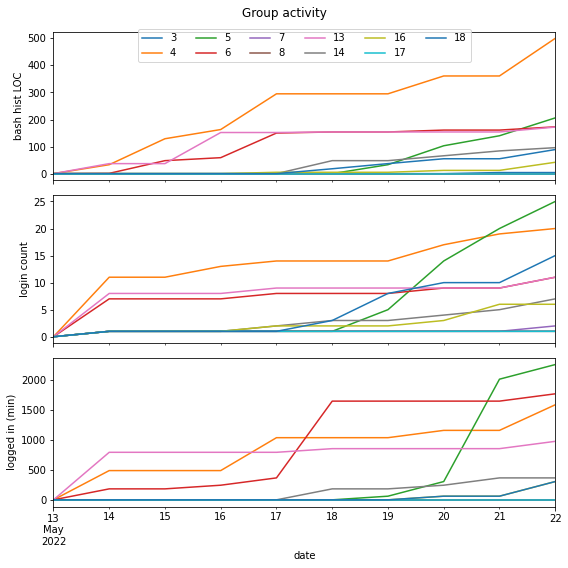

In [1]:
%matplotlib inline

import csv
import pandas as pd
import matplotlib.pyplot as plt


csv_file_hist_loc="./group_activity_hist_loc.csv"
csv_file_login_count="./group_activity_login_count.csv"
csv_file_login_duration="./group_activity_login_duration.csv"
output="./group_activity.png"

csv_files= [csv_file_hist_loc, csv_file_login_count, csv_file_login_duration]
# csv_files=[csv_file_login_duration]

# get group names form AS_config -> all groups with NoConfig

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(8,8))

group_names=['date']

with open('../config/AS_config.txt', mode ='r')as file:
   
  # reading the CSV file
  csvFile = csv.reader(file, delimiter='\t')
 
  # displaying the contents of the CSV file
  for lines in csvFile:
    ASN=lines[0]
    config=lines[2]
        
    if config == "NoConfig":
        group_names.append(ASN)

print(group_names)

counter=0
for cur_csv in csv_files:
  if counter==0: ylabel="bash hist LOC"
  elif counter ==1: ylabel="login count"
  else: ylabel="logged in (min)"
  df = pd.read_csv(cur_csv, header=None, sep=" ")
  df.columns=group_names
  df['date']=pd.to_datetime(df['date'])
  print(df)
  df.set_index('date', inplace=True)
  df.plot.line(y=group_names[1:], ax=ax[counter], legend=False, ylabel=ylabel)
  counter+=1

ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=6, fancybox=True)
plt.suptitle("Group activity")
plt.tight_layout()

In [2]:
df

,3,4,5,6,7,8,13,14,16,17,18
date,,,,,,,,,,,
2022-05-13,0,0,0,0,0,0,0,0,0,0,0
2022-05-14,0,488,0,183,0,0,793,0,0,0,0
2022-05-15,0,488,0,183,0,0,793,0,0,0,0
2022-05-16,0,488,0,244,0,0,793,0,0,0,0
2022-05-17,0,1037,0,366,0,0,793,0,0,0,0
2022-05-18,0,1037,0,1647,0,0,854,183,0,0,0
2022-05-19,0,1037,61,1647,0,0,854,183,0,0,0
2022-05-20,0,1159,305,1647,0,0,854,244,61,0,61
2022-05-21,0,1159,2013,1647,0,0,854,366,61,0,61
